> **DO NOT EDIT IF INSIDE `computational_analysis_of_big_data_2017` folder** 

# Assignment 1

**Handin in Peergrade**: *Wednesday, September 27, 2017*<br>
**Peergrading deadline**: *Wednesday, October 4th, 2017*

## Problems

>**Ex. 2.3.4**: You may have noticed that the data['data'] object has a key called 'after'.
1. What do you think this is?
2. Write a function that takes an integer `N` and the name of a subreddit, and returns a JSON with all posts on the first `N` pages of that subreddit. Use it to retrieve a large number of posts.
3. Make an updated version of the figures you produced in Ex. 2.3.2-3 with this larger dataset.
4. Visualize the number of posts over time.

The 'after' section of the data contains a link to fetch more data that occurs after what has been already fetched.  Due to technological limitations we can't just get all the data at once. 

The code below takes the first 3 pages of the news and GOT subreddits, and graphs the number of comments over the score of a post, for all the posts gathered (5 pages * 25 posts per page = 125 posts)

............................................................................

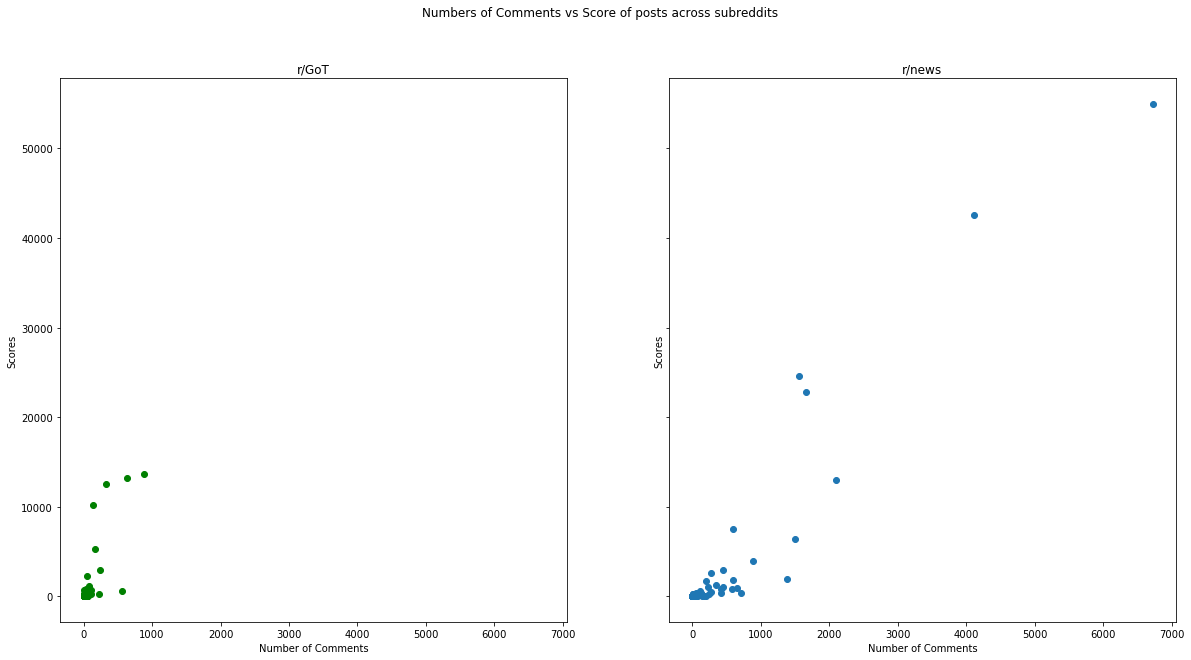

In [20]:
import requests, os, numpy as np, matplotlib.pyplot as plt
from datetime import datetime

def getData(link, args=''):
    """ given the name of a subreddit, return a json object of the sub's data """
    # wait for the request to succeed. if 'data' is not in data's keys, 
    # then the returned json object is just an error message, so try again in 5 seconds.
    data = {}
    while 'data' not in data:
        print('.', end='')
        data = requests.get("https://www.reddit.com/"+link+"/.json" + args).json()
        
    # once we get a populated json object, we can return that.
    return data

def getNPages(subreddit, n):
    """ given a subreddit name and a number of pages to fetch, 
        return the json data requested """
    data = getData('r/'+subreddit)
    posts = data['data']['children']
    for _ in range(n-1):
        nextpage = data['data']['after']
        data = getData('r/'+subreddit, '?after=' + nextpage)
        posts += data['data']['children']
    return posts

# fetch data for each subreddit
nPosts = getNPages('news', 5)
gPosts = getNPages('gameofthrones', 5)

def getScoresAndComments(data):
    """ given the data from a subreddit, 
        return lists of the number of comments and scores of the posts """
    scores = [x['data']['score'] for x in data]
    comments = [x['data']['num_comments'] for x in data]
    return (scores, comments)

# get json data and lists of the scores and comments for the two subs
newsScores, newsComments = getScoresAndComments(nPosts)
GoTScores, GoTComments = getScoresAndComments(gPosts)

# create sub plots
f, (gplt, nplt) = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

# set the overall title
plt.suptitle("Numbers of Comments vs Score of posts across subreddits")

# creating the GoT subplot
gplt.set_ylabel("Scores")
gplt.set_xlabel("Number of Comments")
gplt.set_title("r/GoT")
gplt.scatter(GoTComments, GoTScores, color='green')

# creating the news subplot
nplt.set_title("r/news")
nplt.set_ylabel("Scores")
nplt.set_xlabel("Number of Comments")
nplt.scatter(newsComments, newsScores)

plt.show()

This uses the same data, but plots a histogram of the number of comments on each post.  

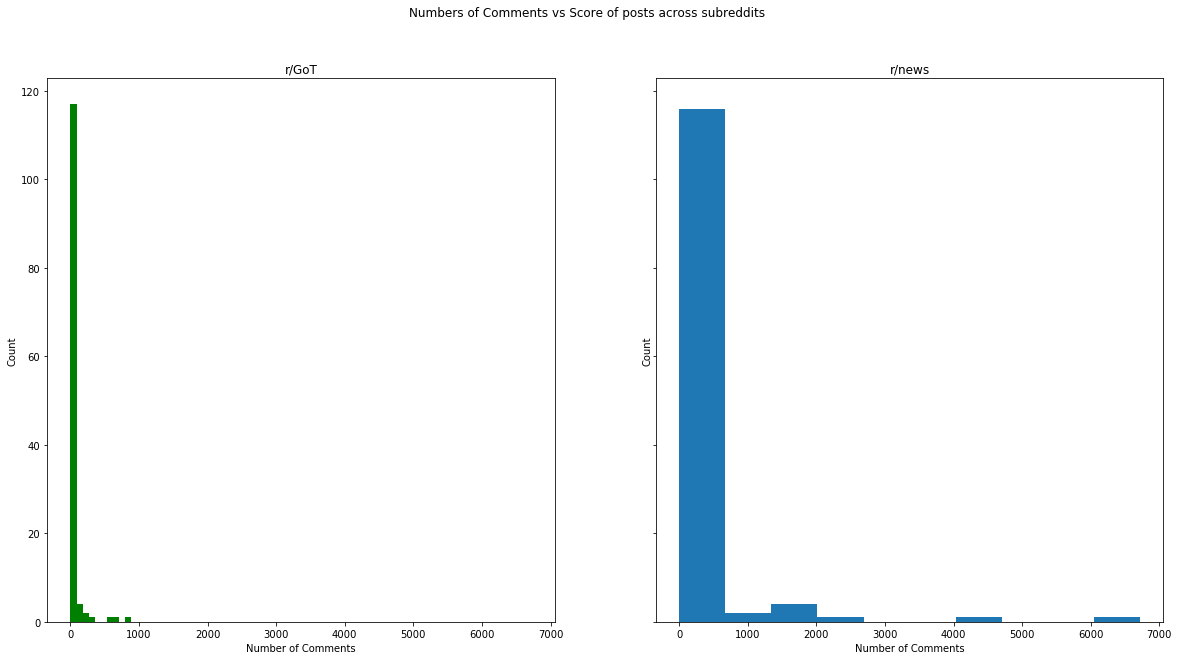

In [21]:
# create sub plots
f, (gplt, nplt) = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

# set the overall title
plt.suptitle("Numbers of Comments vs Score of posts across subreddits")

# creating the GoT subplot
gplt.set_ylabel("Count")
gplt.set_xlabel("Number of Comments")
gplt.set_title("r/GoT")
gplt.hist(GoTComments, color='green')

# creating the news subplot
nplt.set_title("r/news")
nplt.set_ylabel("Count")
nplt.set_xlabel("Number of Comments")
nplt.hist(newsComments)

plt.show()

Here is the code and graphs for number of posts over time.  We used the same data already gathered, and simply extracted the dates from each datum.

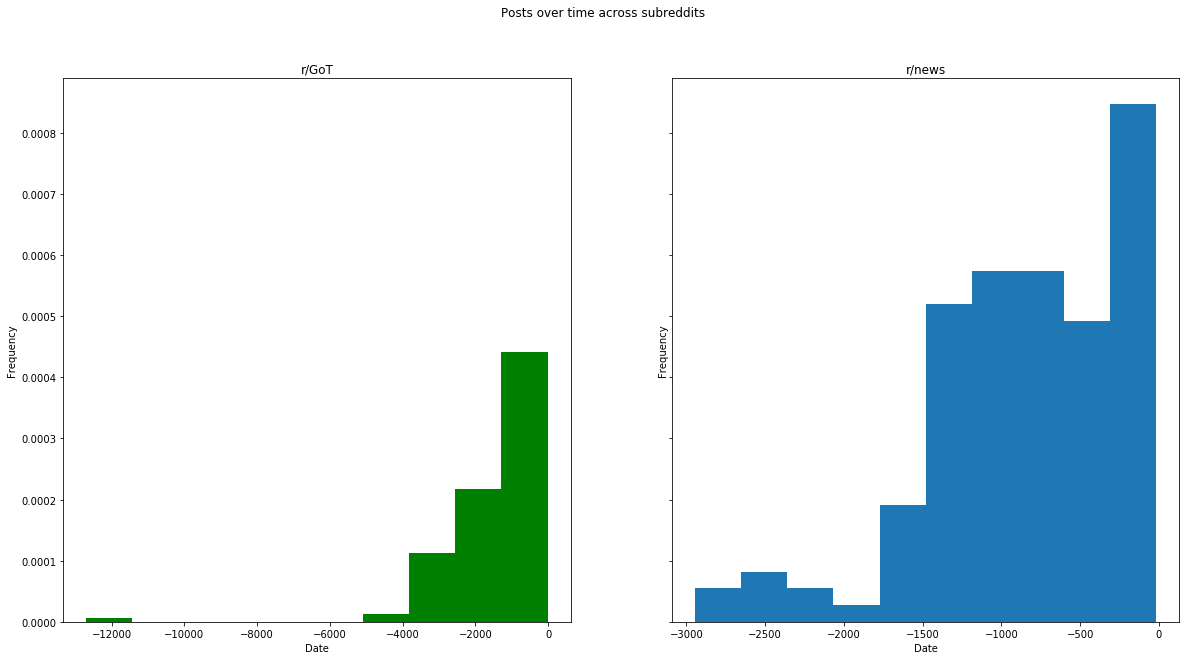

In [22]:
def getDates(data):
    # get current time, return number of seconds since posting (negative numbers)
    current = (datetime.utcnow() - datetime(1970, 1, 1)).total_seconds()
    return [(x['data']['created_utc'] - current) / 60 for x in data]

# get json data and lists of the scores and comments for the two subs
news = getDates(nPosts)
got = getDates(gPosts)

# create sub plots
f, (gplt, nplt) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# set the overall title
plt.suptitle("Posts over time across subreddits")

# creating the GoT subplot
gplt.set_ylabel("Frequency")
gplt.set_xlabel("Date")
gplt.set_title("r/GoT")
gplt.hist(got, color='green', normed=True)

# creating the news subplot
nplt.set_title("r/news")
nplt.set_ylabel("Frequency")
nplt.set_xlabel("Date")
nplt.hist(news, normed=True)

plt.show()

>**Ex. 3.3.2**: Joel gives an example in the book that illustrates the conditional probablity of “both children are girls” knowing “at least one of the children is a girl” versus the probability that "both children are girls" knowing "the older child is a girl". He computes these probabilities with the code below

In [2]:
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print("P(both | older):", both_girls * 1.0 / older_girl  )    # 0.514 ~ 1/2
print("P(both | either): ", both_girls * 1.0 / either_girl )  # 0.342 ~ 1/3

('P(both | older):', 0.5142284569138277)
('P(both | either): ', 0.3415413283641688)


>Now imagine a family with three children. Assume the only genders are 'boy' and 'girl' and that their probability of occuring are equal and independent. Write a similar piece of code that computes:
1. the probability of three girls?
1. the probability of two girls and one boy?
1. the probability of one girl and two boys?
1. the probability of three boys?
1. the probability that all children are girls given that the oldest child is a girl?
1. the probability that all children are girls given that one of the children is a girl?

The code below simulates (100000 times) having three children, sex independently randomly assigned.  We then check for a few conditions, and add up a count for each time the situation occurs (e.g. when all three are boys)

We then display frequencies for each situation occuring out of the total number of trials.

In [10]:
nTrials = 100000

all_girls = 0
more_girls = 0
more_boys = 0
all_boys = 0
any_girls = 0
oldest_girl = 0

for _ in range(nTrials):
    # each trial get 3 random kids and count types of scenarios
    children = [random_kid() for _ in range(3)]
    
    if children[0] == "girl":
        oldest_girl += 1
        
    if "girl" in children:
        any_girls += 1
    else:
        all_boys += 1
        
    if "boy" not in children:
        all_girls += 1
    if children.count("boy") == 2:
        more_boys += 1
    if children.count("girl") == 2:
        more_girls += 1
        
# display probabilities
print("P(all_girls):", all_girls / nTrials)
print("P(more_girls):", more_girls / nTrials)
print("P(more_boys):", more_boys / nTrials)
print("P(all_boys):", all_boys / nTrials)
print("P(all_girls | oldest_girl):", all_girls / oldest_girl)
print("P(all_girls | any_girl):", all_girls / any_girls)

P(all_girls): 0.12613
P(more_girls): 0.37426
P(more_boys): 0.3755
P(all_boys): 0.12411
P(all_girls | oldest_girl): 0.251786641115
P(all_girls | any_girl): 0.14400210072


>**Ex. 4.1.1**: From the Wikipedia API, get a list of all Marvel superheroes and another list of all Marvel supervillains. Use 'Category:Marvel_Comics_supervillains' and 'Category:Marvel_Comics_superheroes' to get the characters in each category.
1. How many superheroes are there? How many supervillains?
2. How many characters are both heroes and villains? What is the Jaccard similarity between the two groups?

>*Hint: Google something like "get list all pages in category wikimedia api" if you're struggling with the query.*

The code below queries wikipedia's category pages to retrieve names of linked wikipedia pages that represent characters in the marvel universe.  We count the number of heroes and villians, as well as compute the jaccard similarity index. 

In [4]:
from __future__ import print_function, division
import requests as rq

q = 'https://en.wikipedia.org/w/api.php?'
args = 'format=json&list=categorymembers&action=query&prop=revisions&rvprop=content&cmlimit=500'

# get the data and iterate while there is a continue key, i.e. there is another page after
data = rq.get(q + args + '&cmtitle=Category:Marvel_Comics_superheroes').json()
hero_list = [h['title'] for h in data['query']['categorymembers']]
while 'continue' in data:
    cnt = data['continue']['cmcontinue']
    data = rq.get(q+args+'&cmtitle=Category:Marvel_Comics_superheroes&cmcontinue=' + cnt).json()
    hero_list += [h['title'] for h in data['query']['categorymembers']]

data = rq.get(q + args + '&cmtitle=Category:Marvel_Comics_supervillains').json()
villain_list = [v['title'] for v in data['query']['categorymembers']]
while 'continue' in data:
    cnt = data['continue']['cmcontinue']
    data = rq.get(q+args+'&cmtitle=Category:Marvel_Comics_supervillains&cmcontinue=' + cnt).json()
    villain_list += [h['title'] for h in data['query']['categorymembers']]

print("There are {} heroes and {} villains.".format(len(hero_list), len(villain_list)))
#[print(h, end=', ') for h in hero_list]
#print()
#[print(v, end=', ') for v in villain_list]
print()
print("There are {} characters playing both sides.".format(len([h for h in hero_list if h in villain_list])))

# getting jaccard index
heroes = set(hero_list)
villains = set(villain_list)

print("The jaccard similarity index is " + str(len(heroes.intersection(villains))/len(heroes.union(villains))))

There are 965 heroes and 1300 villains.

There are 171 characters playing both sides.
The jaccard similarity index is 0.0816618911175


>**Ex. 4.1.2**: Using this list you now want to download all data you can about each character. However, because this is potentially Big Data, you cannot store it your computer's memory. Therefore, you have to store it in your harddrive somehow. 
* Create three folders on your computer, one for *heroes*, one for *villains*, and one for *ambiguous*.
* For each character, download the markdown on their pages and save in a new file in the corresponding hero/villain/ambiguous folder.

>*Hint: Some of the characters have funky names. The first problem you may encounter is problems with encoding. To solve that you can call `.encode('utf-8')` on your markup string. Another problem you may encounter is that characters have a slash in their names. This, you should just replace with some other meaningful character.*

The code below uses the previously-generated list of character titles to fetch their wikipedia pages, and saves the markdown text to a file within a folder depending on their affiliation.  The code that actually opens and writes to file has been commented out to save time, as the files have already been written, and don't need to be overwritten each time the file is run.

In [5]:
heroes = set(hero_list)
villains = set(villain_list)

# split into 3 sets of characters' names
ambig_chars = heroes.intersection(villains)
heroes = heroes.difference(villains)
villains = villains.difference(ambig_chars)

args = 'format=json&action=query&prop=revisions&rvprop=content&titles='

print('Writing Ambiguous Chars')

# iterate through names, get markup data and write to file
# file-writing commented out to avoid redundency
# if you want to write to file, adjust the folder name above each for loop
folder = "../exercises/ex4data/ambiguous/"
for c in ambig_chars:
    d = rq.get(q + args + c).json()
    ID = d['query']['pages'].keys()[0]
    data = d['query']['pages'][ID]['revisions'][0]['*']
    #f = open(folder + c.encode('UTF-8') +".md", 'w')
    #f.write(data.encode('UTF-8'))
    
print("Writing Heroes")
    
folder = "../exercises/ex4data/heroes/"
for c in heroes:
    d = rq.get(q + args + c).json()
    ID = d['query']['pages'].keys()[0]
    data = d['query']['pages'][ID]['revisions'][0]['*']
    #f = open(folder + c.encode('UTF-8') +".md", 'w')
    #f.write(data.encode('UTF-8'))
    
print("Writing Villains")

folder = "../exercises/ex4data/villains/"
for c in villains:
    d = rq.get(q + args + c).json()
    ID = d['query']['pages'].keys()[0]
    data = d['query']['pages'][ID]['revisions'][0]['*']
    #f = open(folder + c.encode('UTF-8') +".md", 'w')
    #f.write(data.encode('UTF-8'))


Writing Ambiguous Chars
Writing Heroes
Writing Villains


### Part 2: Explore data

#### Page lengths

>**Ex. 4.2.1.1**: Extract the length of the page of each character, and plot the distribution of this variable for each class (heroes/villains/ambiguous). Can you say anything about the popularity of characters in the Marvel universe based on your visualization?

>*Hint: The simplest thing is to make a probability mass function, i.e. a normalized histogram. Use `plt.hist` on a list of page lengths, with the argument `normed=True`. Other distribution plots are fine too, though.*

The code below iterates through each directory (ambiguous, heroes, and villains), and saves the size of each file.  The file sizes are then plotted in a histogram, with shared axes. Heroes are clearly defined more in-depth with more information and more popular than villains, in general.

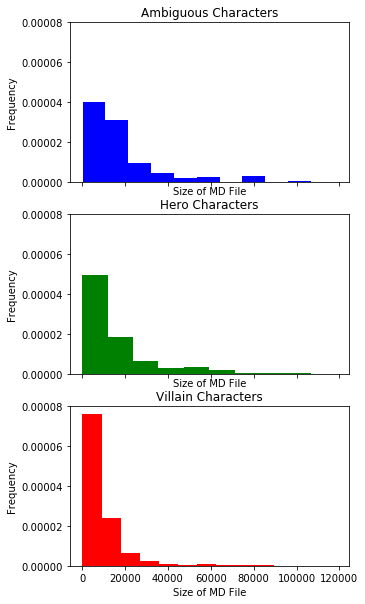

"\n    based on the plots shown below, it's clear that there are more minor characters than major ones.  \n    many more minor villains, whereas heroes are less skewed in this regard.  ambiguous characters \n    have even less of this skew, implying that maybe characters depicted as playing both sides are discussed more\n    in-depth.  This makes sense, as they'd generally require more background than a simple minor villain.\n"

In [6]:
ambig_sizes = []
hero_sizes = []
villain_sizes = []

parent = "../exercises/ex4data/"

# iterate through each directory, adding the size of each file to the list.
for fn in os.listdir(parent+'ambiguous'):
    ambig_sizes.append(os.stat(parent+'ambiguous/'+fn).st_size)
    
for fn in os.listdir(parent+'heroes'):
    hero_sizes.append(os.stat(parent+'heroes/'+fn).st_size)
    
for fn in os.listdir(parent+'villains'):
    villain_sizes.append(os.stat(parent+'villains/'+fn).st_size)
    
f, (aPlt, hPlt, vPlt) = plt.subplots(3, 1, figsize=(5, 10), sharex=True, sharey=True)

aPlt.set_ylabel("Frequency")
aPlt.set_xlabel("Size of MD File")
aPlt.set_title("Ambiguous Characters")
aPlt.hist(ambig_sizes, normed=True, color='blue')

vPlt.set_ylabel("Frequency")
vPlt.set_xlabel("Size of MD File")
vPlt.set_title("Villain Characters")
vPlt.hist(villain_sizes, normed=True, color='red')

hPlt.set_ylabel("Frequency")
hPlt.set_xlabel("Size of MD File")
hPlt.set_title("Hero Characters")
hPlt.hist(hero_sizes, normed=True, color='green')

plt.show()

"""
    based on the plots shown below, it's clear that there are more minor characters than major ones.  
    many more minor villains, whereas heroes are less skewed in this regard.  ambiguous characters 
    have even less of this skew, implying that maybe characters depicted as playing both sides are discussed more
    in-depth.  This makes sense, as they'd generally require more background than a simple minor villain.
"""

>**Ex. 4.2.1.2**: Find the 10 characters from each class with the longest Wikipedia pages. Visualize their page lengths with bar charts. Comment on the result.

The code below iterates through the directories to find filesizes again, and this time the data was saved with the page's name attached to the size.  We then sort these lists to get the names of the pages that are longest within each category, and graph each category.  This data is another insight into the difference of attention given (represented by how long the pages are) between good and bad characters in the Marvel Universe.

Longest pages in ambiguous

Captain America.md
Namor.md
Sabretooth (comics).md
Emma Frost.md
Eddie Brock.md
Rogue (comics).md
Phoenix Force (comics).md
Magneto (comics).md
Mystique (comics).md
Ben Reilly.md

Longest pages in heroes

Spider-Man.md
Iron Man.md
Cyclops (comics).md
Hulk (comics).md
Thor (Marvel Comics).md
Wolverine (character).md
Black Panther (comics).md
Daredevil (Marvel Comics character).md
Deadpool.md
Psylocke.md

Longest pages in villains

Doctor Octopus.md
Doctor Doom.md
Lizard (comics).md
Mandarin (comics).md
Carnage (comics).md
Venom (comics).md
Mysterio.md
Mac Gargan.md
Galactus.md
Hood (comics).md



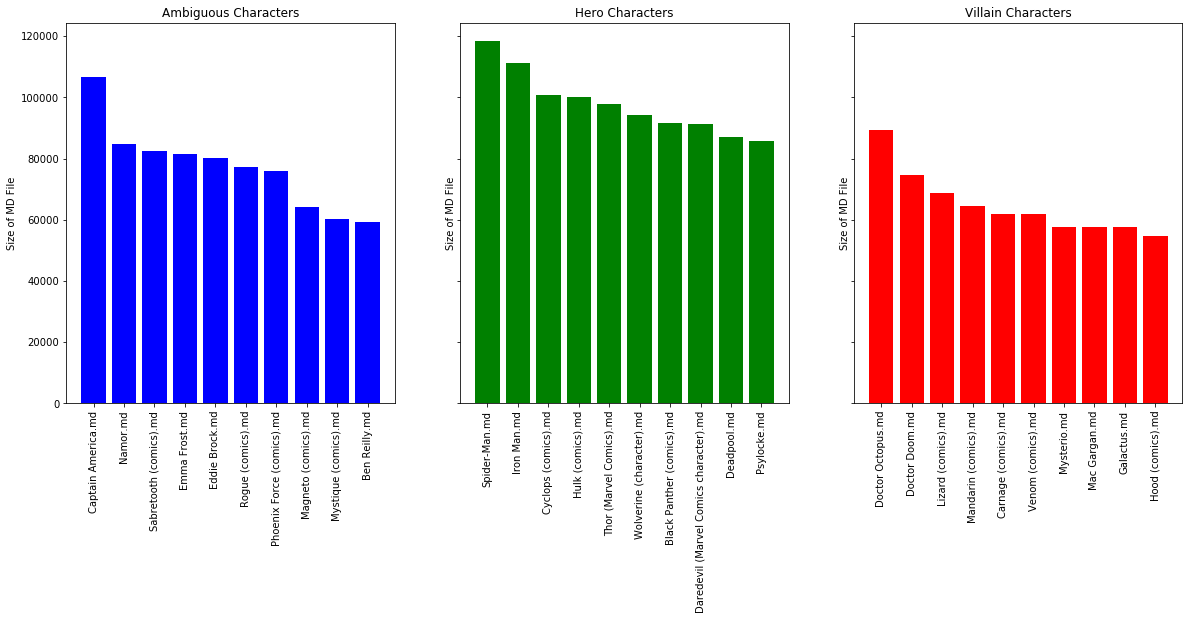

In [15]:
file_sizes = {}
for dr in os.listdir(parent):
    file_sizes.update({dr: []})
    for fn in os.listdir(parent + dr):
        file_sizes[dr].append((fn, os.stat(parent+dr+'/'+fn).st_size))
  

for cat in file_sizes.keys():
    file_sizes[cat].sort(key=lambda e: e[1], reverse=True)
    print("Longest pages in " + cat)
    print()
    [print(name) for name, size in file_sizes[cat][0:10]]
    print()
    
f, (aPlt, hPlt, vPlt) = plt.subplots(1,3, figsize=(20,7), sharey=True)

names, lengths = zip(*file_sizes['ambiguous'][:10])
xpos = np.arange(len(names))
aPlt.bar(xpos, lengths, color='blue')
aPlt.set_ylabel("Size of MD File")
aPlt.set_xticks(xpos)
aPlt.set_xticklabels(names, rotation='vertical')
aPlt.set_title("Ambiguous Characters")

names, lengths = zip(*file_sizes['villains'][:10])
xpos = np.arange(len(names))
vPlt.set_ylabel("Size of MD File")
vPlt.set_xticks(xpos)
vPlt.set_xticklabels(names, rotation='vertical')
vPlt.set_title("Villain Characters")
vPlt.bar(xpos, lengths, color='red')

names, lengths = zip(*file_sizes['heroes'][:10])
xpos = np.arange(len(names))
hPlt.set_ylabel("Size of MD File")
hPlt.set_xticks(xpos)
hPlt.set_xticklabels(names, rotation='vertical')
hPlt.set_title("Hero Characters")
hPlt.bar(xpos, lengths, color='green')

plt.show()

#### Timeline

>**Ex. 4.2.2.1**: We are interested to know if there is a time-trend in the debut of characters.
* Extract into three lists, debut years of heroes, villains, and ambiguous characters.
* Do all pages have a debut year? Do some have multiple? How do you handle these inconsistencies?
* Visualize the amount of heroes introduces over time. You choose how you want to visualize this data, but please comment on your choice. Also comment on the outcome of your analysis.

>*Hint: The debut year is given on the debut row in the info table of a character's Wiki-page. There are many ways that you can extract this variable. You should try to have a go at it yourself, but if you are short on time, you can use this horribly ugly regular expression code:*

>*`re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", markup_text)[0])[0][:-1]`.*

The code below extracts the debut years in the files scraped, and plots them as a histogram for each category. A histogram was chosen as a simple solution to see the frequency distrobution of debut years. Some pages do not have a debut category, which were skipped.  Some pages have multiple, in which case the first was used.  It seems as though many villains were introduced at first, but then their introduction fell off.  Heroes, on the other hand, have a much more normal distrobution of debuts over time.  We still seem to be introducing new heroes, but not as many villains.  Across categories, there are clear Overall, the number of debuts has fallen, which lines up with the number of sequels and remakes Hollywood has been doing recently.  

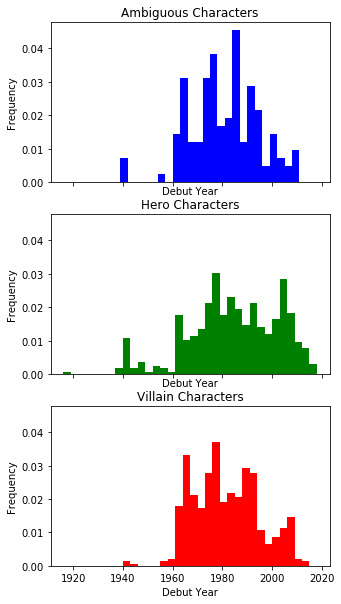

In [12]:
import re
# iterate through each file
cats = ["heroes", "villains", "ambiguous"]
debuts = {"heroes": [], "villains": [], "ambiguous": []}

# iterate through each category
for cat in cats:
    # iterate through files in each category's folder
    for fn in os.listdir(parent + cat):
        # open the file and get the text data inside. 
        f = open(parent + cat + '/' + fn)
        markup_text = f.read()
        # use regex to get pieces of data, and if the data we get isn't empty, save that
        debut_line = re.findall(r"debut.+?\n", markup_text)
        if debut_line:
            yrs = re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", markup_text)[0])
            if yrs:
                yr = yrs[0][:-1]
                debuts[cat].append(int(yr))
               
# plot lists

f, (aPlt, hPlt, vPlt) = plt.subplots(3, 1, figsize=(5, 10), sharex=True, sharey=True)

binwidth=3
aPlt.set_ylabel("Frequency")
aPlt.set_xlabel("Debut Year")
aPlt.set_title("Ambiguous Characters")
aPlt.hist(debuts['ambiguous'], normed=True, color='blue', 
          bins=np.arange(min(debuts['ambiguous']), max(debuts['ambiguous']) + binwidth, binwidth))

vPlt.set_ylabel("Frequency")
vPlt.set_xlabel("Debut Year")
vPlt.set_title("Villain Characters")
vPlt.hist(debuts['villains'], normed=True, color='red',
          bins=np.arange(min(debuts['villains']), max(debuts['villains']) + binwidth, binwidth))

hPlt.set_ylabel("Frequency")
hPlt.set_xlabel("Debut Year")
hPlt.set_title("Hero Characters")
hPlt.hist(debuts['heroes'], normed=True, color='green',
         bins=np.arange(min(debuts['heroes']), max(debuts['heroes']) + binwidth, binwidth))

plt.show()

# skip missing points, only use first year if multiple

>**Ex. 4.2.3.1**: In this exercise we want to extract the team affiliations for each character. Each character may be associated with multiple teams. In the info table of the markup, the teams are listed in the *alliances*-field.
* Write a regex extracts the *alliances*-field.
* Write a regex that extracts each team from the *alliance*-field.
* Count the number of members for each team (hint: use a `defaultdict`).
* Inspect your team names. Are there any that result from inconsistencies in the information on the pages? How do you deal with this?
* Print the 10 largest alliances and their number of members.

The code below determines the alliance of the character in each file, and counts the number of characters in each affiliation.  Team names were noticed to be inconsistent, producing duplicates, so the regex was adjusted to use the link given, not the name, and to cut off parts of the link at a '#', or '(' character.  We also brought all team names to lowercase to avoid duplicates in that sense. 

In [9]:
# iterate through each file
cats = ["heroes", "villains", "ambiguous"]
teams = {}

# iterate through each category
for cat in cats:
    # iterate through files in each category's folder
    for fn in os.listdir(parent + cat):
        # open the file and get the text data inside. 
        f = open(parent + cat + '/' + fn)
        markup_text = f.read()
        alliance_str = re.findall(r"alliances=.*", markup_text)
        if alliance_str:
            # within the alliance string, return X given [[X#H|T]], 
            # stripping certain chars (|,],(,#) to catch inconsistencies
            alliances = re.findall(r"\[\[([^\]^\|^(^#]*)[(\]\])\|]", alliance_str[0])
            for a in alliances:
                a = a.lower()   # catch case inconsistency
                if a in teams:
                    teams[a] += 1
                else:
                    teams[a] = 1
ordered_teams = sorted(teams, key=teams.get, reverse=True)
for i in range(10):
    print(ordered_teams[i] + ": " + str(teams[ordered_teams[i]]))

x-men: 65
avengers : 54
thunderbolts : 44
masters of evil: 39
new warriors: 35
s.h.i.e.l.d.: 34
defenders : 33
x-force: 32
brotherhood of mutants: 29
x-mansion: 23
